In [8]:
import matplotlib.pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\arekk\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [17]:
#--------------------------------------------------------------
txt_file = open("val_score.txt", "r")
file_content = txt_file.read()
#print("The file content are: ", file_content)

content_list = file_content.split("_")
txt_file.close()
#print("The list is: ", content_list)
val_score=[float(i) for i in content_list[:-1]]
#print("The list val_score is: ", val_score)
#--------------------------------------------------------------
txt_file = open("train_loss.txt", "r")
file_content = txt_file.read()
#print("The file content are: ", file_content)

content_list = file_content.split(", grad_fn=<DivBackward0>)_tensor(")
txt_file.close()
#print("The list is: ", content_list)
train_loss=[float(i) for i in content_list[:-1][1:]]
#print("The list train_loss is: ", train_loss)
#--------------------------------------------------------------
txt_file = open("train_score.txt", "r")
file_content = txt_file.read()
print("The file content are: ", file_content)

content_list = file_content.split("_")
txt_file.close()
print("The list is: ", content_list)
train_score=[float(i) for i in content_list[:-1]]
print("The list train_score is: ", train_score)
#--------------------------------------------------------------

The file content are:  0.8671875_0.8984375_0.9296875_0.931640625_0.919921875_0.935546875_0.947265625_0.955078125_0.9609375_0.966796875_0.9609375_0.9453125_0.931640625_0.96484375_0.927734375_0.9453125_0.939453125_0.97265625_0.953125_0.943359375_0.9609375_0.96875_0.958984375_0.96875_0.96875_0.96484375_0.974609375_0.96484375_0.955078125_0.966796875_0.9453125_0.955078125_0.97265625_0.96875_0.96875_0.9609375_0.935546875_0.9453125_0.955078125_0.958984375_0.970703125_0.962890625_0.96484375_0.974609375_0.974609375_0.970703125_0.974609375_0.9765625_0.970703125_0.96875_
The list is:  ['0.8671875', '0.8984375', '0.9296875', '0.931640625', '0.919921875', '0.935546875', '0.947265625', '0.955078125', '0.9609375', '0.966796875', '0.9609375', '0.9453125', '0.931640625', '0.96484375', '0.927734375', '0.9453125', '0.939453125', '0.97265625', '0.953125', '0.943359375', '0.9609375', '0.96875', '0.958984375', '0.96875', '0.96875', '0.96484375', '0.974609375', '0.96484375', '0.955078125', '0.966796875', '0.

In [6]:
def accuracy_epochs_plot(score, p):
    epochs = np.linspace(1, len(score), len(score))
    
    plt.figure(figsize=(10, 8), dpi=80)
    plt.xticks(np.arange(1, len(epochs)+1, step = 1))
    plt.yticks(np.arange(int(min(score) * 10) / 10, 1, step=0.1)) 
    plt.grid(color='black', linestyle='-', linewidth=0.1)
    
    plt.plot(epochs, score, color='blue')

    plt.title(f'Accuracy of the IAKD model with p = {p} in successive epochs', fontsize=16)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)

In [5]:
def accuracy_pstart_plot(acc_iakd, acc_teacher, acc_student):
    p = np.linspace(0, 0.9, 10)
    
    plt.figure(figsize=(10, 8), dpi=80)
    plt.xticks(np.arange(0, 1, step = 0.1))
    plt.yticks(np.arange(int(min(acc_iakd) * 10) / 10, 1, step=0.1)) 
    plt.grid(color='black', linestyle='-', linewidth=0.1)
    
    plt.plot(p, acc_iakd, color='blue')
    plt.axhline(y=acc_teacher, color='red', linestyle='--')
    plt.axhline(y=acc_student, color='green', linestyle='--')

    plt.legend(['IAKD', 'Teacher', 'Student'], fontsize = 14)
    plt.title(f'Accuracy of the model in successive p', fontsize=16)
    plt.xlabel('p_start', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)

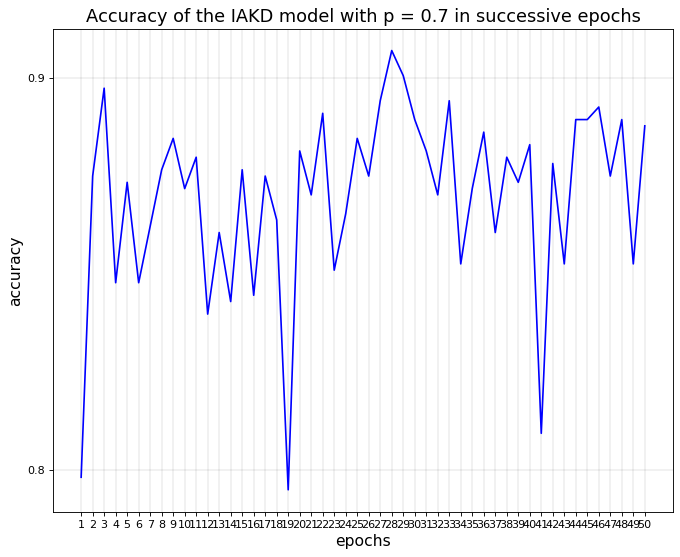

In [9]:
accuracy_epochs_plot(val_score, p=0.7)

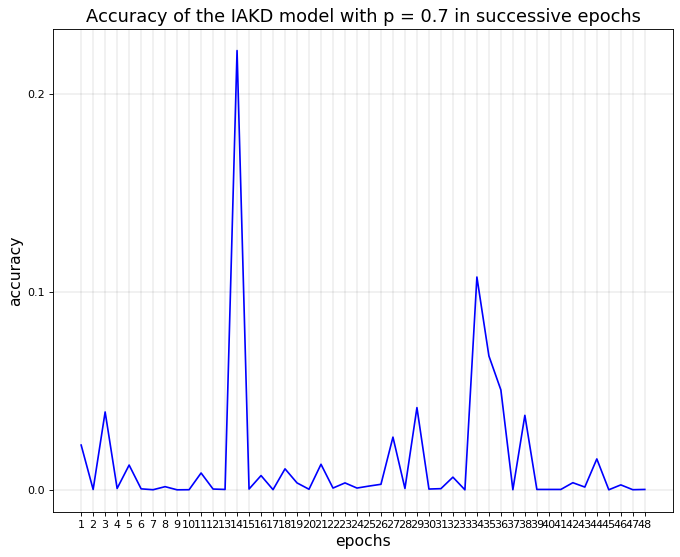

In [15]:
accuracy_epochs_plot(train_loss, p=0.7)

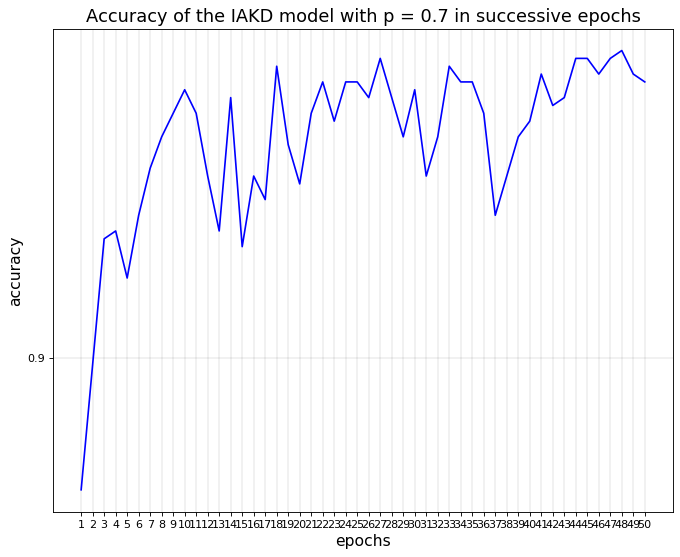

In [18]:
accuracy_epochs_plot(train_score, p=0.7)

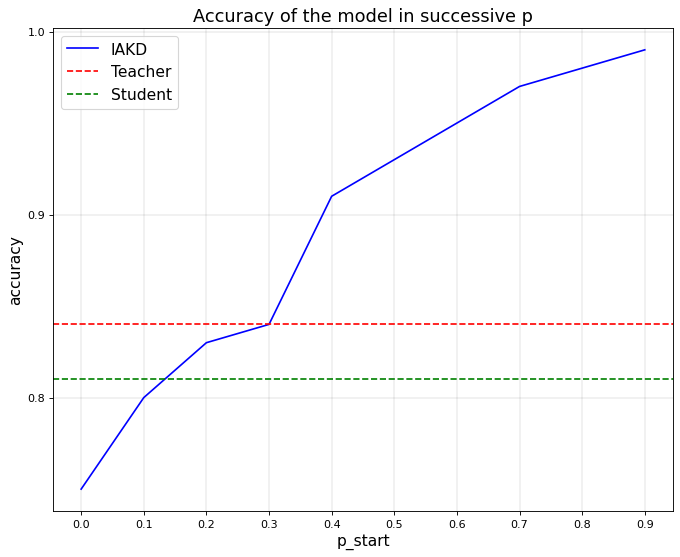

In [100]:
accuracy_pstart_plot(score, teacher, student)